# Stochastic Gradient Descent  
SGD picks random instances in the training set at every step and compute the gradients from that single instance.
This makes it very fast, however it's a lot less regular than BGD for example, since the cost function will "bounce" up and down, decreasing only on average. Over time, it will end up very close the the minimum, but it will keep bouncing, never settling down. The final parameters values are good, but not optimal.
There is a little trick we can use to optimize the results. (I'll explain down the road)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42) #Persistance in randomness.

We start by generating a dataset.

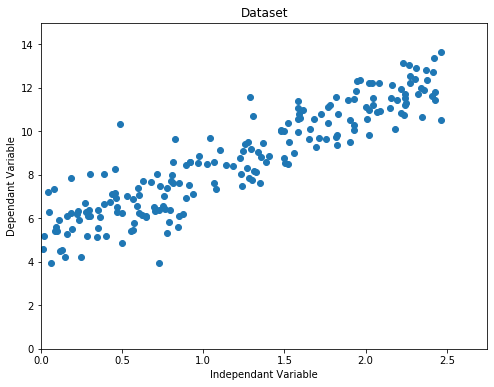

In [2]:
X = 2.5 * np.random.rand(200, 1)
y = 5 + 3 * X + np.random.randn(200, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("Independant Variable")
plt.ylabel("Dependant Variable")
plt.axis([0, 2.75, 0, 15])
plt.show()

We will then use this formula to compute the gradient of each randomly picked instance from the dataset.  
$\Large\frac {\partial } {\partial \theta _{j}}MSE = 2 X_i^{T}\left( X_i\theta -y_i\right)$  
To minimize the "bouncing" over time, we will gradually decrease the learning rate.  
`learning_schedule()` will return a learning rate relative to the number epoch and current iteration in the dataset.  
We choose 2 starting values (arbitrarily-ish).

In [3]:
def learning_schedule(t, t0, t1):
    return t0 / (t+t1)

def stoch_gradient_descent(X, y, n_epochs=50, m=200, t0=5, t1=50):
    theta = np.random.randn(2,1)
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T @ (xi @ theta - yi)
            learning_rate = learning_schedule(epoch * m + i, t0, t1)
            theta -= learning_rate * gradients
    return theta

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=21) # Split the dataset
n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape
X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

In [5]:
theta = stoch_gradient_descent(X_b_train, y_train);
print(theta)

[[5.2628903 ]
 [2.90397311]]


The actual function that we used to generate the data is $\large y = 5+3x_i+\textrm{Gaussian noise}$  
We found $\large\theta_0 = 5.26$ and $\large\theta_1 = 2.90$.  
If we compare that to the Batch Gradient Descent and the Normal equation results, we can see that this isn't as optimal.
Every time we train the model, we'll get different values, potentially better than the BGD and NE results, but just as likely to be worse, like here.
However, as we said earlier, the SGD algorithm is much faster than BGD or NE, and it can also be implemented as an out-of-core algorithm.
  
Now let's make some predictions using theta.
We do that by applying a dot product between the X values and theta:

In [6]:
predict_test = X_b_test @ theta

Let's plot the results!

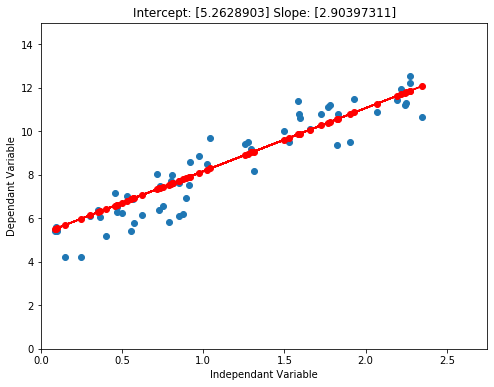

In [7]:
fig = plt.figure(figsize=(8,6))
plt.title(f'Intercept: {theta[0]} Slope: {theta[1]}')
plt.scatter(X_test, y_test)
plt.xlabel("Independant Variable")
plt.ylabel("Dependant Variable")
plt.scatter(X_test, predict_test, color='red')
plt.plot(X_test, predict_test, color='red')
plt.axis([0, 2.75, 0, 15])
plt.show()